In [1]:
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import sys
import matplotlib

%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.5.2 | packaged by conda-forge | (default, Jan 19 2017, 15:41:23) [MSC v.1900 64 bit (AMD64)]
Pandas version 0.22.0
Matplotlib version 2.0.0


In [3]:
names=['Bob','Jessica','Mary','John','Mel']

In [4]:
# This means the random samples will always be identical
random.seed(500)

random_names = [names[random.randint(low=0, high=len(names))] for i in range(1000)]

random_names[:10]

['Mary',
 'Jessica',
 'Jessica',
 'Bob',
 'Jessica',
 'Jessica',
 'Jessica',
 'Mary',
 'Mary',
 'Mary']

In [5]:
births = [random.randint(low=0, high=1000) for i in range(1000)]

births[:10]

[968, 155, 77, 578, 973, 124, 155, 403, 199, 191]

In [6]:
BabyDataSet=list(zip(random_names,births))
BabyDataSet[:10]

[('Mary', 968),
 ('Jessica', 155),
 ('Jessica', 77),
 ('Bob', 578),
 ('Jessica', 973),
 ('Jessica', 124),
 ('Jessica', 155),
 ('Mary', 403),
 ('Mary', 199),
 ('Mary', 191)]

In [7]:
df=pd.DataFrame(data=BabyDataSet,columns=['Names','Births'])
df[:10]

,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973
5,Jessica,124
6,Jessica,155
7,Mary,403
8,Mary,199
9,Mary,191


In [8]:
df.to_csv('births1880.csv', index=False, header=False)

In [12]:
#pd.read_csv?

df = pd.read_csv('births1880.csv', header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
0    1000 non-null object
1    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [13]:
df.head()

,0,1
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973


In [14]:
df.tail()

,0,1
995,John,151
996,Jessica,511
997,John,756
998,Jessica,294
999,John,152


In [19]:
df.rename(columns={0:'Names',1:'Births'},inplace=True)
df.tail()

,Names,Births
995,John,151
996,Jessica,511
997,John,756
998,Jessica,294
999,John,152


In [20]:
import os
os.remove('births1880.csv')

In [22]:
print(type(df['Names'])) # a Series object
df['Names'].unique()

<class 'pandas.core.series.Series'>


array(['Mary', 'Jessica', 'Bob', 'John', 'Mel'], dtype=object)

In [23]:
df.groupby?

In [26]:
grouped=df.groupby(by=['Names'])
grouped

In [28]:
df = grouped.sum()
df

,Births
Names,
Bob,106817
Jessica,97826
John,90705
Mary,99438
Mel,102319


In [29]:
df.Births.max()

106817

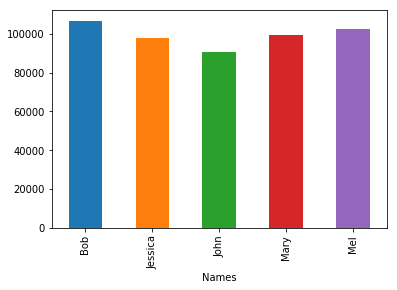

In [31]:
df['Births'].plot.bar()